In [2]:
# https://www.kaggle.com/datasets/loveall/appliances-energy-prediction

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
%matplotlib inline

In [6]:
df = pd.read_csv('data/energydata_complete.csv',index_col='date',infer_datetime_format=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

<AxesSubplot:xlabel='date'>

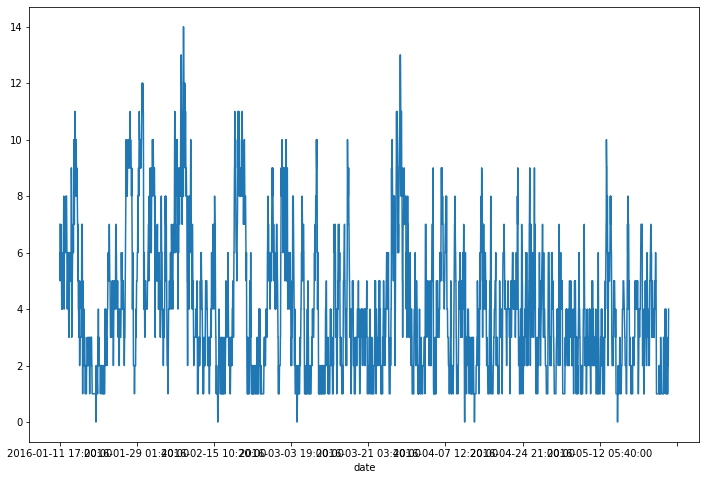

In [8]:
df['Windspeed'].plot(figsize=(12,8))

<AxesSubplot:xlabel='date'>

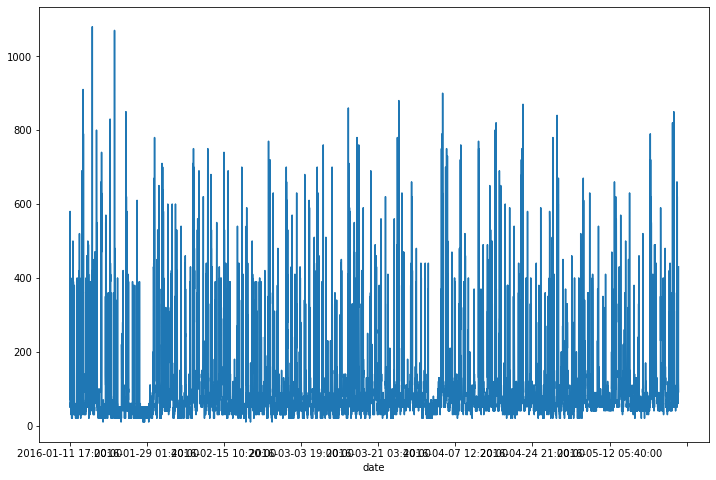

In [9]:
df['Appliances'].plot(figsize=(12,8))

In [10]:
len(df)

19735

In [11]:
df.head(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [12]:
df.tail(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [15]:
# predict 24 hours into the future, cut some training by removing a couple of months of data

In [14]:
df.loc['2016-05-01':]

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.200000,38.200000,18.390000,41.400000,23.200000,36.400000,19.73,37.730000,...,19.166667,38.200000,4.300000,763.700000,86.000000,2.000000,40.000000,2.200000,15.310003,15.310003
2016-05-01 00:10:00,60,0,21.150000,38.172500,18.390000,41.500000,23.133333,36.466667,19.70,37.663333,...,19.133333,38.290000,4.283333,763.716667,86.333333,2.166667,38.166667,2.216667,11.240067,11.240067
2016-05-01 00:20:00,50,0,21.133333,38.090000,18.323333,41.500000,23.200000,36.500000,19.70,37.590000,...,19.133333,38.363333,4.266667,763.733333,86.666667,2.333333,36.333333,2.233333,21.808814,21.808814
2016-05-01 00:30:00,50,0,21.100000,38.090000,18.290000,41.500000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.500000,4.250000,763.750000,87.000000,2.500000,34.500000,2.250000,47.000534,47.000534
2016-05-01 00:40:00,60,0,21.100000,38.030000,18.290000,41.560000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.633333,4.233333,763.766667,87.333333,2.666667,32.666667,2.266667,8.059441,8.059441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.70,45.590000,...,23.200000,46.790000,22.733333,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.70,45.590000,...,23.200000,46.790000,22.600000,755.200000,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.70,45.730000,...,23.200000,46.790000,22.466667,755.200000,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [17]:
df = df.loc['2016-05-01':]
df = df.round(2)

In [18]:
len(df)

3853

In [19]:
# How many rows per day? We know it's every 10 min
24*60/10

144.0

In [20]:
test_days = 2

In [25]:
test_ind = test_days*144

In [22]:
test_ind

288

In [24]:
# Notice the minus sign in our indexing

In [26]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [27]:
train.shape

(3565, 28)

In [28]:
test.shape

(288, 28)

In [32]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [31]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [33]:
# define generator
length = 144 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train,
                                length=length, batch_size=batch_size)

In [34]:
len(scaled_train)

3565

In [35]:
len(generator) 

3421

In [36]:
X,y = generator[0]

In [37]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03896104 0.         0.13798978 ... 0.14319527 0.75185111 0.75185111]
Predict this y: 
 [[0.03896104 0.         0.30834753 0.29439421 0.16038492 0.49182278
  0.0140056  0.36627907 0.24142857 0.24364791 0.12650602 0.36276002
  0.12       0.28205572 0.06169297 0.15759185 0.34582624 0.39585974
  0.09259259 0.39649608 0.18852459 0.96052632 0.59210526 0.1
  0.58333333 0.13609467 0.4576746  0.4576746 ]]


Create the model

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
scaled_train.shape

(3565, 28)

In [41]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(100,input_shape=(length,scaled_train.shape[1])))

# Final Prediction (one neuron per feature)
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               51600     
                                                                 
 dense (Dense)               (None, 28)                2828      
                                                                 
Total params: 54,428
Trainable params: 54,428
Non-trainable params: 0
_________________________________________________________________


In [44]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [45]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, 
                                           length=length, batch_size=batch_size)

In [46]:
model.fit_generator(generator,epochs=10,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/10


C:\Users\antho\AppData\Local\Temp\ipykernel_20036\687208369.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,


3421/3421 [==============================] - 32s 8ms/step - loss: 0.0117 - val_loss: 0.0104
Epoch 2/10
3421/3421 [==============================] - 28s 8ms/step - loss: 0.0080 - val_loss: 0.0090
Epoch 3/10
3421/3421 [==============================] - 28s 8ms/step - loss: 0.0075 - val_loss: 0.0092


In [47]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

<AxesSubplot:>

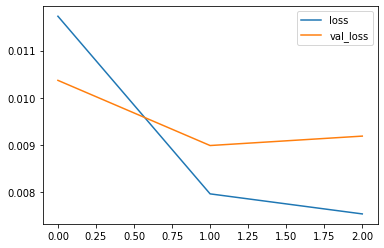

In [48]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [49]:
first_eval_batch = scaled_train[-length:]

In [50]:
first_eval_batch

array([[0.1038961 , 0.        , 0.72231687, ..., 0.53550296, 0.15909546,
        0.15909546],
       [0.11688312, 0.        , 0.73424191, ..., 0.52662722, 0.40344207,
        0.40344207],
       [0.11688312, 0.        , 0.73424191, ..., 0.51775148, 0.20452271,
        0.20452271],
       ...,
       [0.18181818, 0.        , 0.70017036, ..., 0.50118343, 0.33340004,
        0.33340004],
       [0.09090909, 0.        , 0.70017036, ..., 0.51952663, 0.78747248,
        0.78747248],
       [0.1038961 , 0.        , 0.70017036, ..., 0.53846154, 0.77286372,
        0.77286372]])

In [51]:
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))

In [52]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 259ms/step


array([[ 0.09723073,  0.03315052,  0.7275378 ,  0.3653099 ,  0.5560616 ,
         0.43099415,  0.40521705,  0.42832708,  0.7230129 ,  0.38632834,
         0.29969925,  0.37623626,  0.6623881 , -0.02786423,  0.6153064 ,
         0.37952912,  0.5069861 ,  0.31864017,  0.5313091 ,  0.37550944,
         0.61309254,  0.5495419 ,  0.42607594,  0.19458832,  0.54961807,
         0.5386408 ,  0.5594051 ,  0.54750174]], dtype=float32)

In [53]:
scaled_test[0]

array([0.19480519, 0.        , 0.70017036, 0.3920434 , 0.53007217,
       0.41064526, 0.40616246, 0.41913319, 0.72714286, 0.4115245 ,
       0.30722892, 0.36445121, 0.66777778, 0.        , 0.61119082,
       0.39840637, 0.51618399, 0.32953105, 0.53703704, 0.34024896,
       0.6057377 , 0.52631579, 0.41881579, 0.2       , 0.55283333,
       0.53372781, 0.76305783, 0.76305783])

In [54]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 14ms/step


In [55]:
test_predictions

[array([ 0.09723073,  0.03315052,  0.7275378 ,  0.3653099 ,  0.5560616 ,
         0.43099415,  0.40521705,  0.42832708,  0.7230129 ,  0.38632834,
         0.29969925,  0.37623626,  0.6623881 , -0.02786423,  0.6153064 ,
         0.37952912,  0.5069861 ,  0.31864017,  0.5313091 ,  0.37550944,
         0.61309254,  0.5495419 ,  0.42607594,  0.19458832,  0.54961807,
         0.5386408 ,  0.5594051 ,  0.54750174], dtype=float32),
 array([ 0.09246291,  0.0480717 ,  0.7333857 ,  0.36211225,  0.5673799 ,
         0.42734692,  0.40052778,  0.42879805,  0.7233528 ,  0.3757868 ,
         0.30302736,  0.38284186,  0.6630524 , -0.05013625,  0.61775976,
         0.3731703 ,  0.49891177,  0.31963867,  0.5262257 ,  0.38299158,
         0.6192914 ,  0.55905515,  0.42945132,  0.19224988,  0.5189632 ,
         0.5435068 ,  0.5622903 ,  0.5514698 ], dtype=float32),
 array([ 0.08883493,  0.0600984 ,  0.7359405 ,  0.3535833 ,  0.57311505,
         0.4201404 ,  0.3956354 ,  0.42379034,  0.72206426,  0.365186

In [57]:
true_predictions = scaler.inverse_transform(test_predictions)

In [58]:
true_predictions

array([[ 9.48676640e+01,  9.94515494e-01,  2.46606469e+01, ...,
         7.70302947e+00,  2.79634723e+01,  2.73686621e+01],
       [ 9.11964424e+01,  1.44215114e+00,  2.46949740e+01, ...,
         7.78526494e+00,  2.81076468e+01,  2.75669460e+01],
       [ 8.84028934e+01,  1.80295207e+00,  2.47099708e+01, ...,
         7.76675445e+00,  2.80619277e+01,  2.77531345e+01],
       ...,
       [ 1.10409708e+02, -5.29874861e+00,  3.04230692e+01, ...,
         8.58824193e-02,  4.18781555e+01,  2.23747138e+01],
       [ 1.10409708e+02, -5.29874995e+00,  3.04230678e+01, ...,
         8.58838044e-02,  4.18781585e+01,  2.23747108e+01],
       [ 1.10409696e+02, -5.29874995e+00,  3.04230678e+01, ...,
         8.58848117e-02,  4.18781555e+01,  2.23747123e+01]])

In [66]:
test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.1,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.1,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.1,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.1,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.1,55.17,2.00,30.83,7.28,10.27,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20


In [60]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)

In [61]:
true_predictions

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,94.867664,0.994515,24.660647,37.120819,24.324088,34.954333,24.993250,36.873948,24.261090,37.234677,...,21.969069,37.994800,16.659458,756.629555,56.381771,1.945883,37.977084,7.703029,27.963472,27.368662
1,91.196442,1.442151,24.694974,37.032404,24.465227,34.831677,24.959768,36.882859,24.263470,37.002341,...,21.941619,38.157087,16.810711,756.846457,56.638300,1.922499,36.137793,7.785265,28.107647,27.566946
2,88.402893,1.802952,24.709971,36.796578,24.536745,34.589321,24.924837,36.788113,24.254450,36.768715,...,21.905785,38.267771,16.881741,756.978525,56.469686,1.845937,33.912103,7.766754,28.061928,27.753135
3,88.196994,2.116772,24.726692,36.549965,24.584035,34.285545,24.888834,36.672083,24.255429,36.552959,...,21.871097,38.338555,16.923441,757.098612,56.165470,1.780184,31.965461,7.713389,27.981563,27.890608
4,89.141973,2.399973,24.745726,36.303982,24.620109,33.971937,24.855172,36.542541,24.264278,36.345841,...,21.839065,38.367738,16.958252,757.205246,55.794861,1.726295,30.367784,7.635469,27.924109,28.005632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,110.409639,-5.298749,30.423068,16.782002,29.284451,23.854044,21.099788,10.901307,31.533522,27.671743,...,24.440714,52.261722,17.417304,762.000436,40.179418,10.306895,6.516955,0.085881,41.878153,22.374714
284,110.409685,-5.298749,30.423068,16.782000,29.284453,23.854045,21.099788,10.901309,31.533522,27.671741,...,24.440714,52.261722,17.417307,762.000436,40.179422,10.306896,6.516948,0.085882,41.878153,22.374714
285,110.409708,-5.298749,30.423069,16.782000,29.284453,23.854047,21.099788,10.901309,31.533523,27.671740,...,24.440714,52.261725,17.417307,762.000440,40.179425,10.306897,6.516951,0.085882,41.878155,22.374714
286,110.409708,-5.298750,30.423068,16.782000,29.284453,23.854044,21.099788,10.901311,31.533523,27.671741,...,24.440714,52.261725,17.417310,762.000437,40.179434,10.306897,6.516953,0.085884,41.878158,22.374711


In [97]:
compare = pd.DataFrame(test.iloc[0])

In [98]:
compare['predicted'] = true_predictions.iloc[0]

In [99]:
compare

,2016-05-25 18:10:00,predicted
Appliances,170.00,94.867664
lights,0.00,0.994515
T1,24.50,24.660647
RH_1,37.86,37.120819
T2,24.00,24.324088
RH_2,34.27,34.954333
T3,25.00,24.993250
RH_3,36.70,36.873948
T4,24.29,24.261090
RH_4,37.79,37.234677
